In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from functools import reduce
import matplotlib.dates as mdates
from math import ceil
from datetime import datetime, timedelta
# from sklearn.impute import SimpleImputer

In [18]:
df = pd.read_csv('dataset_mood_smartphone.csv')

In [19]:
"""
Check stats on NaN values and Remove NaN values
"""
# df with NaN values
df_na = df[pd.isna(df['value'])]

# Counts NaN values for each variable
df_na_variables = df_na['variable'].value_counts()
df = df.dropna()

In [20]:
"""
Cut out measurements until continuous measurements of mood for 
"""

'\nCut out measurements until continuous measurements of mood for \n'

In [21]:
df['time'] = pd.to_datetime(df['time'])
# df['date'] = df['time'].dt.date

df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.floor('D')  # This normalizes the time part to 00:00, keeping it as Timestamp

df['hour'] = df['time'].dt.hour
df['time_of_day'] = df['time'].dt.time
unique_variables = df['variable'].unique()
participants = df['id'].unique()
days = df['date'].unique()

In [22]:
"""
Delete time gabs in mood AS14.01, AS14.12, AS14,17
"""

# AS14.01
# Ensure 'date' is in datetime format for easy comparison
# df['date'] = pd.to_datetime(df['date'])

# Define the start and end of the date range to exclude
start_date = pd.to_datetime('2014-02-26')
end_date = pd.to_datetime('2014-03-20')

# Exclude data points for 'id' = 'AS14.01' within the specified date range
df = df[~((df['id'] == 'AS14.01') & (df['date'] >= start_date) & (df['date'] <= end_date))]

# Now filtered_df contains the data excluding the specified date range for 'id' = 'AS14.01'

# AS14.12
# 2014-03-15 - 2014, 3, 26
# Ensure 'date' is in datetime format for easy comparison
df['date'] = pd.to_datetime(df['date'])

# Define the start and end of the date range to exclude
start_date = pd.to_datetime('2014-03-15')
end_date = pd.to_datetime('2014-03-26')

# Exclude data points for 'id' = 'AS14.01' within the specified date range
df = df[~((df['id'] == 'AS14.12') & (df['date'] >= start_date) & (df['date'] <= end_date))]

# AS14.17
# 2014, 3, 20

# Ensure 'date' is in datetime format for easy comparison
df['date'] = pd.to_datetime(df['date'])

# Define the start and end of the date range to exclude
start_date = pd.to_datetime('2014-03-04')
end_date = pd.to_datetime('2014-03-20')

# Exclude data points for 'id' = 'AS14.01' within the specified date range
df = df[~((df['id'] == 'AS14.17') & (df['date'] >= start_date) & (df['date'] <= end_date))]

print(df)

        Unnamed: 0       id                    time        variable   value  \
7                8  AS14.01 2014-03-21 09:00:00.000            mood   6.000   
8                9  AS14.01 2014-03-21 11:00:00.000            mood   6.000   
9               10  AS14.01 2014-03-21 15:00:00.000            mood   7.000   
10              11  AS14.01 2014-03-21 19:00:00.000            mood   6.000   
11              12  AS14.01 2014-03-21 21:00:00.000            mood   6.000   
...            ...      ...                     ...             ...     ...   
376907     2770399  AS14.30 2014-04-11 07:51:16.948  appCat.weather   8.032   
376908     2772465  AS14.30 2014-04-19 11:00:32.747  appCat.weather   3.008   
376909     2774026  AS14.30 2014-04-26 10:19:07.434  appCat.weather   7.026   
376910     2774133  AS14.30 2014-04-27 00:44:48.450  appCat.weather  23.033   
376911     2784435  AS14.32 2014-04-07 18:25:14.036  appCat.weather  22.431   

             date  hour      time_of_day  
7      2

In [23]:
"""
Cut out all mood measurements outside the time frame 
08:00 - 22:00
"""

# Only cut it out for mood
# df = df[
#     (df['variable'] != 'mood') | 
#     ((df['time'].dt.hour >= 8) & (df['time'].dt.hour < 22))
# ]

# Cut it out for all variables
df = df[
    ((df['time'].dt.hour >= 8) & (df['time'].dt.hour < 22))
]

print(df)

        Unnamed: 0       id                    time        variable   value  \
7                8  AS14.01 2014-03-21 09:00:00.000            mood   6.000   
8                9  AS14.01 2014-03-21 11:00:00.000            mood   6.000   
9               10  AS14.01 2014-03-21 15:00:00.000            mood   7.000   
10              11  AS14.01 2014-03-21 19:00:00.000            mood   6.000   
11              12  AS14.01 2014-03-21 21:00:00.000            mood   6.000   
...            ...      ...                     ...             ...     ...   
376905     2769513  AS14.30 2014-04-07 18:16:49.107  appCat.weather  60.829   
376906     2769514  AS14.30 2014-04-07 18:21:04.197  appCat.weather   3.018   
376908     2772465  AS14.30 2014-04-19 11:00:32.747  appCat.weather   3.008   
376909     2774026  AS14.30 2014-04-26 10:19:07.434  appCat.weather   7.026   
376911     2784435  AS14.32 2014-04-07 18:25:14.036  appCat.weather  22.431   

             date  hour      time_of_day  
7      2

In [24]:
"""
Cut out all measurements on all variables for each participant outside the timeframe in which mood was measured
"""
# Initialize an empty DataFrame to hold the filtered data
filtered_df = pd.DataFrame()

for participant in participants:
    # Get the mood data for the current participant
    id_df = df[(df['variable'] == 'mood') & (df['id'] == participant)]
    
    # Calculate start and end dates for mood measurements
    start_date = id_df['date'].min()
    end_date = id_df['date'].max()
    
    # Filter the original df to keep rows within the date range for this participant
    participant_data = df[df['id'] == participant]
    participant_filtered = participant_data[(participant_data['date'] >= start_date) & (participant_data['date'] <= end_date)]
    
    # Append the filtered data to the cumulative DataFrame
    filtered_df = pd.concat([filtered_df, participant_filtered], ignore_index=True)
    
# print(filtered_df)
df = filtered_df
print(df)
# Now, filtered_df contains only the data for each participant within the date ranges of their mood measurements.

# Print df to check results
print(df[(df['variable'] == 'mood')])

        Unnamed: 0       id                    time          variable   value  \
0                8  AS14.01 2014-03-21 09:00:00.000              mood   6.000   
1                9  AS14.01 2014-03-21 11:00:00.000              mood   6.000   
2               10  AS14.01 2014-03-21 15:00:00.000              mood   7.000   
3               11  AS14.01 2014-03-21 19:00:00.000              mood   6.000   
4               12  AS14.01 2014-03-21 21:00:00.000              mood   6.000   
...            ...      ...                     ...               ...     ...   
301022     2567223  AS14.33 2014-05-30 10:52:37.028  appCat.utilities  37.237   
301023     2567224  AS14.33 2014-05-30 10:53:14.276  appCat.utilities  76.903   
301024     2567225  AS14.33 2014-05-30 11:42:41.286  appCat.utilities   4.051   
301025     2567315  AS14.33 2014-05-30 15:05:58.599  appCat.utilities   4.306   
301026     2567367  AS14.33 2014-05-30 20:06:23.109  appCat.utilities   2.006   

             date  hour    

In [25]:
"""
Detecting outliers with IQR
"""
def get_outlier_indices(group, threshold=6.0):
    Q1 = group['value'].quantile(0.25)
    Q3 = group['value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Find outliers and return their indices
    outlier_mask = (group['value'] < lower_bound) | (group['value'] > upper_bound)
    if outlier_mask.any():
        return group[outlier_mask].index.tolist()
    else:
        return []

# Exclude 'mood' data before applying outlier detection
df_filtered = df[df['variable'] != 'mood']

# Get indices of outliers in each group
outlier_indices = df_filtered.groupby('variable').apply(get_outlier_indices).explode()

# Convert Series to list, filtering out NaN values if any (resulting from empty lists)
outlier_indices = [idx for idx in outlier_indices if pd.notna(idx)]

# Drop the outliers by index to create a new DataFrame without outliers
df_without_outliers = df.drop(outlier_indices)

# Print the original and new DataFrame sizes to see the effect
print(f"Original DataFrame size: {len(df)}")
print(f"DataFrame size without outliers: {len(df_without_outliers)}")

df = df_without_outliers

Original DataFrame size: 301027
DataFrame size without outliers: 292543


In [26]:
"""
Average data for each day, for each participant and impude values on all predictors in each missing day
"""
# non_time_variables = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']
non_time_variables = ['mood', 'circumplex.arousal', 'circumplex.valence']
df_time = df[~df['variable'].isin(non_time_variables)]
# df_non_time = df[df['variable'].isin(non_time_variables)]


all_id_df = []
# For time variables, we take the mean of each day averaged over the active participants of the corresponding day
# Correct use of DataFrame to avoid indexing errors
for participant in participants:
    id_df = df.loc[(df['id'] == participant)]
    id_daily_avg_df_time = df_time.groupby(['date', 'variable'])['value'].sum().reset_index()

    # Assuming df_non_time should be defined for each participant
    id_df_non_time = id_df[id_df['variable'].isin(non_time_variables)]
    id_daily_avg_df_non_time = id_df_non_time.groupby(['date', 'variable'])['value'].mean().reset_index()

    # Merges the two dataframes
    id_daily_avg_df = pd.concat([id_daily_avg_df_non_time, id_daily_avg_df_time], ignore_index=True)
    
    # defines end and start date
    start_date = id_df['date'].min()
    end_date = id_df['date'].max()
    all_dates = pd.date_range(start_date, end_date, freq='D')

    id_df_list = []
    for variable in unique_variables:
        id_variable_df = id_daily_avg_df.loc[id_daily_avg_df['variable'] == variable].copy()

        # Check for missing dates and add them if necessary
        for date in all_dates:
            if not (id_variable_df['date'] == date).any():
                new_row = pd.DataFrame({'variable': [variable], 'value': [pd.NA], 'date': [date]})
                id_variable_df = pd.concat([id_variable_df, new_row], ignore_index=True)

        if variable in non_time_variables:
            id_variable_df.fillna(method='ffill', inplace=True)
            id_variable_df.fillna(method='bfill', inplace=True)
            id_variable_df.fillna(value=0, inplace=True)
        else:
            id_variable_df.fillna(value=0, inplace=True)
        
        id_df_list.append(id_variable_df)

    combined_df_id = pd.concat(id_df_list, ignore_index=True)
    combined_df_id['id'] = participant
    all_id_df.append(combined_df_id)

all_df_id = pd.concat(all_id_df, ignore_index=True)
print(all_df_id)

# df = all_df_id

            date        variable  value       id
0     2014-03-21            mood   6.20  AS14.01
1     2014-03-22            mood   6.40  AS14.01
2     2014-03-23            mood   6.80  AS14.01
3     2014-03-24            mood   6.00  AS14.01
4     2014-03-25            mood   6.75  AS14.01
...          ...             ...    ...      ...
36660 2014-05-24  appCat.weather   0.00  AS14.33
36661 2014-05-25  appCat.weather   0.00  AS14.33
36662 2014-05-29  appCat.weather   0.00  AS14.33
36663 2014-05-30  appCat.weather   0.00  AS14.33
36664 2014-05-31  appCat.weather   0.00  AS14.33

[36665 rows x 4 columns]


In [27]:

active_subjects_day = df.groupby(['date'])['id'].unique().reset_index()

In [28]:
"""
Average data for each day:
"""
# non_time_variables = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']
non_time_variables = ['mood', 'circumplex.arousal', 'circumplex.valence']
df_time = all_df_id[~all_df_id['variable'].isin(non_time_variables)]

# For time variables, we take the mean of each day averaged over the active participants of the corresponding day
daily_avg_df_time = df_time.groupby(['date', 'variable'])['value'].sum().reset_index()
daily_avg_df_time['value'] = daily_avg_df_time['value'] / len(active_subjects_day['date'])

# For non-time variables, we take the mean of all the inputs for each hour
df_non_time = all_df_id[all_df_id['variable'].isin(non_time_variables)]
daily_avg_df_non_time = df_non_time.groupby(['date', 'variable'])['value'].mean().reset_index()

# Merges the two dataframes
daily_avg_df = pd.concat([daily_avg_df_non_time, daily_avg_df_time], ignore_index=True)

print(daily_avg_df)

           date            variable      value
0    2014-03-05  circumplex.arousal   0.000000
1    2014-03-05  circumplex.valence   0.333333
2    2014-03-05                mood   6.333333
3    2014-03-06  circumplex.arousal  -0.600000
4    2014-03-06  circumplex.valence   0.600000
...         ...                 ...        ...
1819 2014-06-08    appCat.utilities   0.000000
1820 2014-06-08      appCat.weather   0.000000
1821 2014-06-08                call   0.000000
1822 2014-06-08              screen  12.987562
1823 2014-06-08                 sms   0.000000

[1824 rows x 3 columns]


Text(0.5, 1.0, 'Correlation Heatmap of Variables')

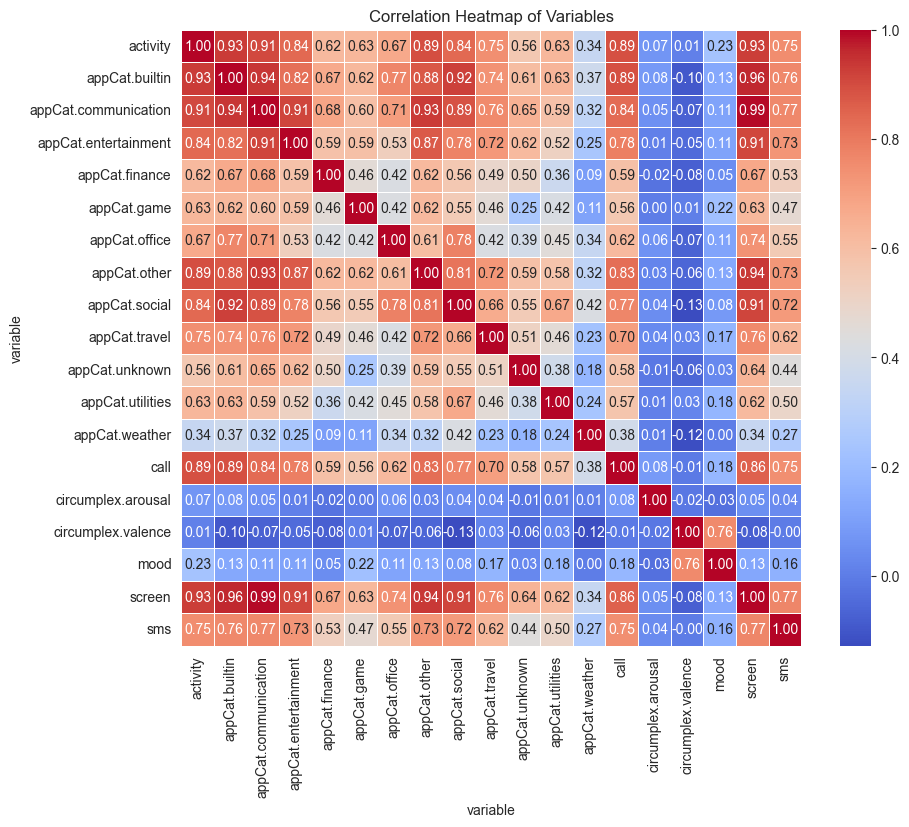

In [29]:
"""
Corr. heatmap, index on date
"""
df_pivoted = daily_avg_df.pivot_table(index='date', columns='variable', values='value')
corr_matrix = df_pivoted.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')